# What insights can we get from: "CMU" in "Twitter"?
## --Twitter data analysis about CMU
### Xiaoyu Zhou (xiaoyuz2), Zheng Zhang (zhengz2), Yichi Zhang (yichiz1)

[1 Introduction](#1.-Introduction)

[2 Pipeline and procedure](#2.-Pipeline-and-procedure)
- [2.1 Data Acquirement](#2.1-Data-Acquirement)
- [2.2 Data Exploration and basic Cleaning](#2.2-Data-Exploration-and-basic-Cleaning)
- [2.3 Text Aggregation](#2.3-Text-Aggregation)
- [2.4 Sentimental Analysis](#2.4-Sentimental-Analysis)

[3 Application and the things that can do in the furture](#3.-Application-and-the-things-that-can-do-in-the-furture)

[4 Conclusion](#4.-Conclusion)

# 1. Introduction

The problem that I had: Before I came to Carnegie Mellon University (CMU), all the information I can get is from google. The information is good and professional, but maybe it seems to be too professional and I really want to get some vivid information about CMU. So how can I get this kind of information?

The potential resource that I have: Twitter is an interesting social network that contains a lot of real and timely topics and comments from people. In addition, twitter API provides some useful functions to help use analyze a certain topic. So, why not using Twitter to find some interesting information about CMU?

What things can we do using Twitter API to get some interesting information:
1. Basic statistic and visualization about the twitter that we acquired from twitter API.
2. Text Aggregation to find some potential group about CMU.
3. Sentimental Analysis to see whether people like CMU or not.
4. Topic center exploration using PageRank Algorithm.

Now, let's begin our data mining and information exploration!

# 2. Pipeline and procedure

This part contains our whole data analysis pipeline and procedure, including the vivid information and knowledge that we get from twitter about CMU.

## 2.1 Data Acquirement

For data acquirement, we use [tweepy](http://www.tweepy.org) , which is a wrapper of twitter API in python to help user get data [1]. Our data acquirement can divide into two subparts. The first subpart is searching the twitter that contains the word "CMU" and the related information about this twitter. The second part is based on the twitter object that we got from subpart I, we extracted the user ID from the twitter object and used the user ID to get all the followers' ID of that user, so that we can use the follower, followee information to build the network graph and ran pagerank algorithm to find the topic center.

- [2.1.1 Get twitters that contains CMU](#2.1.1-Get-twitters-that-contains-CMU)
- [2.1.2 Follower Data Acquirement](#2.1.2-Follower-Data-Acquirement)

### 2.1.1 Get twitters that contains CMU

Here are the code that how we get the twitters object using tweepy.

In [ ]:
# test tweet
# Reference: https://www.toptal.com/python/twitter-data-mining-using-python

import tweepy
import json
import time

consumer_key = "XXXXX"
consumer_secret = "XXXXX"
access_token = "XXXXX"
access_token_secret = "XXXXX"

# Creating the authentication object

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

query = "CMU"
outputfilename = "result-all.txt"
# Language code (follows ISO 639-1 standards)
language = "en"
count = 0

with open(outputfilename, "w") as f:
    for tweet in tweepy.Cursor(api.search,
                               q=query,
                               rpp=100,
                               lang="en").items():

        json_object = json.dumps(tweet._json)
        count += 1
        f.write(json_object + "\n")

Since we are free user of twitter API, we cannot get the whole data, which contains the twitter for the whole month with full text, we can only get the data about last 7 days with only part of the twitter (the first ~100 word of the real twitter). So the data that we acquire is not the entire data. 

Also, we find that twitter API have the time rate limit for the request of API, so we need to do something to wait to get the data. And this kind of limit make the data acquirement process very slow, so we try to acquire data using multiple accounts and distributed the data acquirement process manully. If one day, we need to acuquire, we need to learn some better way to distributed the data acquirement process.

Finally, we got 8,272 records (twitter objects) that contains the word "CMU". The data is stored in "result-all.txt". The response are json string. One sample response is like that:

{"id_str": "992929699297988608", "source": "<a href=\"http://twitter.com/download/android\" rel=\"nofollow\">Twitter for Android</a>", "favorited": false, "created_at": "Sun May 06 00:51:02 +0000 2018", "truncated": false, "in_reply_to_status_id_str": null, "in_reply_to_status_id": null, "in_reply_to_screen_name": null, "is_quote_status": false, "metadata": {"result_type": "recent", "iso_language_code": "en"}, "retweeted": false, "coordinates": null, "in_reply_to_user_id_str": null, "contributors": null, "entities": {"hashtags": [], "user_mentions": [{"id_str": "2591983790", "indices": [3, 14], "id": 2591983790, "screen_name": "D3NEWomens", "name": "D3 Northeast Women's"}], "urls": [], "symbols": []}, "in_reply_to_user_id": null, "lang": "en", "id": 992929699297988608, "retweet_count": 1, "place": null, "user": {"id_str": "1067021683", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/449313065742262272/35mWPV1k.png", "created_at": "Sun Jan 06 23:54:04 +0000 2013", "profile_link_color": "00B3AA", "profile_background_tile": true, "favourites_count": 3029, "geo_enabled": true, "profile_text_color": "333333", "profile_sidebar_fill_color": "DDEEF6", "statuses_count": 20105, "verified": false, "description": "The Headmaster.  I provide bulletin board material for D3 Tennis Players.  Primarily covering Men's DIII Tennis.  Let the Rackets do the talking!", "listed_count": 10, "friends_count": 216, "entities": {"url": {"urls": [{"indices": [0, 23], "display_url": "division3tennis.com", "url": "https://t.co/Ojfmjx3PC1", "expanded_url": "http://www.division3tennis.com"}]}, "description": {"urls": []}}, "profile_background_color": "C0DEED", "location": "Sports Related Gossip", "id": 1067021683, "profile_image_url_https": "https://pbs.twimg.com/profile_images/597525079354904578/AB2A7vS1_normal.jpg", "protected": false, "is_translation_enabled": false, "follow_request_sent": false, "translator_type": "none", "profile_image_url": "http://pbs.twimg.com/profile_images/597525079354904578/AB2A7vS1_normal.jpg", "following": false, "default_profile": false, "default_profile_image": false, "url": "https://t.co/Ojfmjx3PC1", "screen_name": "d3AtlanticSouth", "time_zone": null, "profile_banner_url": "https://pbs.twimg.com/profile_banners/1067021683/1495729162", "profile_use_background_image": false, "contributors_enabled": false, "profile_sidebar_border_color": "FFFFFF", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/449313065742262272/35mWPV1k.png", "has_extended_profile": true, "lang": "en", "followers_count": 960, "notifications": false, "utc_offset": null, "is_translator": false, "name": "d3AtlanticSouth"}, "retweeted_status": {"id_str": "992923773501353984", "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>", "favorited": false, "created_at": "Sun May 06 00:27:29 +0000 2018", "truncated": true, "in_reply_to_status_id_str": null, "in_reply_to_status_id": null, "in_reply_to_screen_name": null, "is_quote_status": false, "metadata": {"result_type": "recent", "iso_language_code": "en"}, "retweeted": false, "coordinates": null, "in_reply_to_user_id_str": null, "contributors": null, "entities": {"hashtags": [], "user_mentions": [], "urls": [{"indices": [117, 140], "display_url": "twitter.com/i/web/status/9\u2026", "url": "https://t.co/cj3BuFXyod", "expanded_url": "https://twitter.com/i/web/status/992923773501353984"}], "symbols": []}, "in_reply_to_user_id": null, "lang": "en", "favorite_count": 0, "retweet_count": 1, "place": null, "user": {"id_str": "2591983790", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "created_at": "Fri Jun 27 21:18:13 +0000 2014", "profile_link_color": "1DA1F2", "profile_background_tile": false, "favourites_count": 1048, "geo_enabled": false, "profile_text_color": "333333", "profile_sidebar_fill_color": "DDEEF6", "statuses_count": 2149, "verified": false, "description": "all that is D3 Northeast Women's Tennis!!", "listed_count": 2, "friends_count": 321, "entities": {"url": {"urls": [{"indices": [0, 23], "display_url": "division3tennis.com", "url": "https://t.co/Ojfmjxlr0B", "expanded_url": "http://www.division3tennis.com"}]}, "description": {"urls": []}}, "profile_background_color": "C0DEED", "location": "d3northeastwomens@gmail.com", "id": 2591983790, "profile_image_url_https": "https://pbs.twimg.com/profile_images/482639892753555456/egWancL3_normal.jpeg", "protected": false, "is_translation_enabled": false, "follow_request_sent": false, "translator_type": "none", "profile_image_url": "http://pbs.twimg.com/profile_images/482639892753555456/egWancL3_normal.jpeg", "following": false, "default_profile": true, "default_profile_image": false, "url": "https://t.co/Ojfmjxlr0B", "screen_name": "D3NEWomens", "time_zone": "Atlantic Time (Canada)", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2591983790/1460937340", "profile_use_background_image": true, "contributors_enabled": false, "profile_sidebar_border_color": "C0DEED", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "has_extended_profile": false, "lang": "en", "followers_count": 440, "notifications": false, "utc_offset": -10800, "is_translator": false, "name": "D3 Northeast Women's"}, "text": "Pool C w 1 more day left:\nC1 Midd\nC2 Wesleyan\nC3 Tufts\nC4 Pomona\nC5 Amherst\nC6 Chicago\nC7 CMU\nC8 Washu\n-------\nBowd\u2026 https://t.co/cj3BuFXyod", "id": 992923773501353984, "geo": null}, "text": "RT @D3NEWomens: Pool C w 1 more day left:\nC1 Midd\nC2 Wesleyan\nC3 Tufts\nC4 Pomona\nC5 Amherst\nC6 Chicago\nC7 CMU\nC8 Washu\n-------\nBowdoin (los\u2026", "favorite_count": 0, "geo": null}

### 2.1.2 Follower Data Acquirement

Based on the data that we got above, we got the followers for each user that had said something about "CMU". So that we can build graph for the following analysis. [2]

In [ ]:
import json
import numpy as np
import tweepy
import time
import sys

consumer_key = "XXXXX"
consumer_secret = "XXXXX"
access_token = "XXXXX"
access_token_secret = "XXXXX"

user_followers = {}

CMU_user_set = set()

with open("result-full.txt", "r") as f:
    for line in f:
        tweet = json.loads(line.strip())
        user_id = str(tweet['user']['id'])
        if "Pittsburgh" in tweet["user"]["location"] or tweet["user"]["location"] == "":
            CMU_user_set.add(user_id)

# Here we manully distributed the user_set, so that it can accelerate the data acquirement process.
CMU_user_set = list(CMU_user_set)[974:999]

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)
# api = tweepy.API(auth)

count = 0
with open("result-full.txt", "r") as f:
    for user_id in CMU_user_set:
        count += 1
        try:
            c = tweepy.Cursor(api.followers_ids, user_id=user_id)
            followers_ids = []
            for page in c.pages():
                followers_ids += page

            inner_followers_ids = []
            for ids in followers_ids:
                ids = str(ids)
                if ids in CMU_user_set:
                    inner_followers_ids.append(ids)
            inner_followers_count = len(inner_followers_ids)
            user_followers[user_id] = (inner_followers_count, inner_followers_ids)
            print(user_id)
            print(inner_followers_count)
            print("count:" + str(count))
            # print(followers_count)
        except tweepy.TweepError:
            print("unauthorized")
            continue
                
json_object = json.dumps(user_followers)
with open("followers_cmu3-3-2.txt", "w") as f:
    f.write(json_object)

Here, we got 261 user's data (nodes) and 1117 connections (edges). And one sample result we stored is like:

sample: "4547426907": [3, ["2230737471", "770343971298107392", "40060150"]]

format: "userID": [followers count, [follower1ID, follower2ID, follwer3ID, ...]]

## 2.2 Data Exploration and basic Cleaning

In this part, we do some data exploration to find some basic knowledge about CMU using the basic statistic and data visualization techniques. Here, we do these basic things:
- [2.2.1 MapReduce to extract user object and twitter object](#2.2.1-MapReduce-to-extract-user-object-and-twitter-object)
- [2.2.2 Where people sent twitter about CMU?](#2.2.2-Where-people-sent-twitter-about-CMU?)
- [2.2.3 When people sent twitter about CMU?](#2.2.3-When-people-sent-twitter-about-CMU?)
- [2.2.4 Who said the most about CMU? And the frequency people say about CMU.](#2.2.4-Who-said-the-most-about-CMU?-And-the-frequency-people-say-about-CMU.)
- [2.2.5 What are the top words and keywords about CMU?](#2.2.5-What-are-the-top-words-and-keywords-about-CMU?)

Since we want to practice the techniques that we learn in this course, we write the mapreduce program to do the basic data extraction process and this way can be used when we had more data in the future.

### 2.2.1 MapReduce to extract user object and twitter object

First, we used mapreduce to create user object and tweet object. Each user object and twitter object extract the data that we need to use for further analysis.

In [6]:
# This is copy from hw4 map reduce part
import json
import multiprocessing
import glob
import time
import operator
import itertools
import collections
import regex
import re
import string
import numpy as np
from scipy import spatial
from scipy.spatial import distance

def init_worker_context(context_to_set):
    """Called when each worker is initialized, it sets the context which will be shared across all
    mappers.
    """
    global context
    # context can be accessed from the mapper function of every worker
    context = context_to_set

class MapReduceJob(object):

    def __init__(self, map_func, reduce_func, num_workers=None, worker_context=None):
        """ Initialize a Map Reduce Job with the map, reduce functions, number of worker threads and the shared context
        across mappers.
        Args:
            map_func:     function to map inputs to intermediate data. Takes as argument one input value and
                            returns a tuple with the key and a value to be reduced.
            reduce_func:  function to reduce partitioned version of intermediate data to final output. Takes as
                            argument a key as produced by map_func and a list of the values associated with that key.
            num_workers:  int, the number of workers to create in the pool. Defaults to #CPUs on the current host.
            context:      any application-specific type, stores data that should be read-accessible from all workers
                            but it should NOT be written while the MR job is in progress.
        Attributes to set:
            map_func:     function to map inputs to intermediate data. (same description as above)
            reduce_func:  function to reduce intermediate data to final output. (same description as above)
            pool:         multiprocessing.Pool object, with num_workers worker threads. The threads should initialize
                            the worker context passed before running any map jobs.
                            (See init_worker_context function above.)
        """
        self.map_func = map_func
        self.reduce_func = reduce_func
        if worker_context is not None:
            self.pool = multiprocessing.Pool(num_workers, initializer=init_worker_context, initargs=(worker_context,))
        else:
            self.pool = multiprocessing.Pool(num_workers)

    def partition(self, mapped_values):
        """Organize the mapped values by their key.
        Args:
            mapped_values: output key-value pairs from mappers
        Outputs:
            list:          returns an unsorted sequence of tuples with a key and a sequence of values.
        """
        partitioned_data = collections.defaultdict(list)
        for key, value in mapped_values:
            partitioned_data[key].append(value)
        return partitioned_data.items()

    def __call__(self, inputs, chunksize=1):
        """Process the inputs through the map and reduce functions given.
        Args:
            inputs:       (array-like) contains the input data to be processed.
            chunksize=1 : the portion of the input data to hand to each worker; can be used to tune performance
                            during the mapping phase.
        Outputs:
            reduced_values: list of outputs from reduce functions.
        """
        # partition inputs according to chunksize
        indices = list(range(0, len(inputs), chunksize))
        if indices[-1] != len(inputs):
            indices.append(len(inputs))
        inputs_split = [inputs[start:end] for start, end in zip(indices[:-1], indices[1:])]
        # map
        map_responses = self.pool.map(self.map_func, inputs_split)
        # partition by key
        partitioned_data = self.partition(itertools.chain(*map_responses))
        # reduce
        reduced_values = self.pool.map(self.reduce_func, partitioned_data)
        return reduced_values

In [18]:
def file_tw(filenames):
    """Read a file and return a sequence of (word, occurances) values.
    """
    p = {'Pittsburgh, Pa', 'Pittsburgh PA', 'Pittsburgh, PA', 'Pittsburgh, PA, USA', 'Pittsburgh'}
    output = []
    for filename in filenames:
        with open(filename, 'r') as f:
            for line in f:
                res = {}
                try:
                    tmp = json.loads(line, encoding='utf-8')
                    lang = tmp["lang"]
                    if lang != 'en':
                        continue
                    
                    uid = tmp['user']['id']
                    res['screen_name'] = tmp['user']['screen_name']
                    res['tid'] = tmp["id"]
                    res['text'] = tmp["text"]
                    res['created_at'] = tmp["created_at"]
                    created_at = res['created_at']
                    res['retweet_count'] = tmp["retweet_count"]
                    res['favorite_count'] = tmp["favorite_count"]
                    res['followers_count'] = tmp["user"]["followers_count"]
                    res['location'] = tmp["user"]["location"]
                except:
                    print('err')
                    continue
                t = re.search(r'(\d{2}:\d{2}:\d{2})',created_at).group(1)
                res['hour'] = int(t[0:2])
                res['minutes'] = int(t[3:5])
                output.append((uid, json.dumps(res)))
    return output

def uid_reduce(item):
    """Convert the partitioned data for a word to a
    tuple containing the word and the number of occurances.
    """
    uid, tw_list = item
    return (uid, tw_list)

def file_tw2(filenames):
    """Read a file and return a sequence of (word, occurances) values.
    """
    output = []
    for filename in filenames:
        with open(filename, 'r') as f:
            for line in f:
                res = {}
                try:
                    tmp = json.loads(line, encoding='utf-8')
                    lang = tmp["lang"]
                    if lang != 'en':
                        continue
                    res['uid'] = tmp['user']['id']
                    res['screen_name'] = tmp['user']['screen_name']
                    tid = tmp["id"]
                    res['text'] = tmp["text"]
                    res['created_at'] = tmp["created_at"]
                    created_at = res['created_at']
                    res['retweet_count'] = tmp["retweet_count"]
                    res['favorite_count'] = tmp["favorite_count"]
                    res['followers_count'] = tmp["user"]["followers_count"]
                except:
                    print('err')
                    continue
                t = re.search(r'(\d{2}:\d{2}:\d{2})',created_at).group(1)
                res['hour'] = int(t[0:2])
                res['minutes'] = int(t[3:5])
                output.append( (tid, json.dumps(res)) )
    return output

def tid_reduce(item):
    """Convert the partitioned data for a word to a
    tuple containing the word and the number of occurances.
    """
    uid, tw_list = item
    return (uid, tw_list[0])


input_files = glob.glob('result-full.txt')
data_filter = MapReduceJob(file_tw, uid_reduce, num_workers=8)
print('User Map-Reduce job initialized.')
time.sleep(1)
user_tw_data = data_filter(input_files, chunksize=1)
print("User sample: " + str(user_tw_data[0]))
print("User counts: " + str(len(user_tw_data)))
user_tw_data = sorted(user_tw_data, key=lambda x: len(x[1]), reverse=True)
print('User Map-Reduce job done.')

data_filter2 = MapReduceJob(file_tw2, tid_reduce, num_workers=8)
print('Twitter Map-Reduce job initialized.')
time.sleep(1)
tw_data = data_filter2(input_files, chunksize=1)
print("Twitter object smaple: " + str(tw_data[0]))
print("Twitter counts: " + str(len(tw_data)))
print('Twitter Map-Reduce job done.')

User Map-Reduce job initialized.
User sample: (967086430852849664, ['{"followers_count": 13, "minutes": 13, "text": "CMU Mavericks are the RMAC Champs and my freaking beast of a friend not only pitched a no hitter but is the tournam\\u2026 https://t.co/b8gj2P4YYx", "screen_name": "shumhow_shumway", "retweet_count": 0, "location": "Grand Junction, CO", "favorite_count": 1, "hour": 22, "created_at": "Sat May 05 22:13:42 +0000 2018", "tid": 992890103440723968}'])
User counts: 4817
User Map-Reduce job done.
Twitter Map-Reduce job initialized.
Twitter object smaple: (992763853770457088, '{"followers_count": 10151, "minutes": 52, "text": "It would be so cool if CMU actually had a department of \\"so-called machine learning technology.\\" https://t.co/NCJU4NeI4t", "screen_name": "JSEllenberg", "retweet_count": 4, "favorite_count": 38, "uid": 1087183776, "created_at": "Sat May 05 13:52:02 +0000 2018", "hour": 13}')
Twitter counts: 8272
Twitter Map-Reduce job done.


Then is the visualization part.

### 2.2.2 Where people sent twitter about CMU?

In [14]:
import matplotlib
matplotlib.use("svg")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0) 
# AUTOLAB_IGNORE_STOP

The most popular location: ('', 1182)
['', 'Pittsburgh, PA', 'Mount Pleasant, MI', 'Michigan, USA', 'Grand Junction, CO', 'United States', 'Detroit, MI', 'Michigan', 'Pittsburgh', 'New York, NY', 'Fayette, MO', 'Central Michigan University', 'Rwanda', 'Chicago, IL', 'Mt. Pleasant, MI', 'Seattle, WA', 'London, England', 'Washington, DC', 'Grand Rapids, MI', 'San Francisco, CA']
[1182, 286, 163, 73, 36, 35, 31, 31, 25, 24, 23, 22, 21, 21, 18, 18, 18, 16, 16, 14]


Text(0.5,1,'Where people say about CMU')

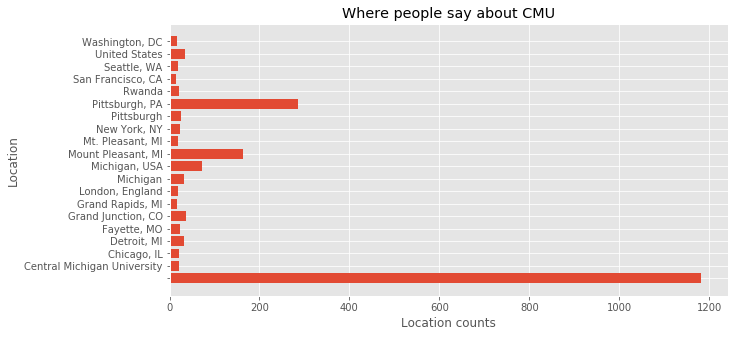

In [15]:
# histogram our data with numpy
from collections import Counter

locations = [json.loads(d[1][0])["location"] for d in user_tw_data]
locations_count = dict(Counter(locations))
# print(locations_count)
counts = sorted(locations_count.items(), key=lambda x:x[1], reverse=True)
print("The most popular location: " + str(counts[0]))
top20_name = [d[0] for d in counts[:20]]
top20 = [d[1] for d in counts[:20]]
print(top20_name) 
print(top20)

fig, ax = plt.subplots()
ax.barh(top20_name, top20)
ax.set_xlabel('Location counts')
ax.set_ylabel('Location')
ax.set_title('Where people say about CMU')

From the picture above, **there are some things that we can find**:
1. Most of people do not want to share their location information when they send twitter.
2. CMU is not only the abbreviation of Carnegie Mellon University, it is also the abbreviation of other things, e.g, Central Michigan University. This information help us to filter out the user's that are not in Pittsburgh to keep that user that has higher probability to say something about Carnegie Mellon University. The data analysis after this are only consider the user in Pittsburgh.

We change the filter rule and redo the mapreduce job.

In [19]:
def file_tw(filenames):
    """Read a file and return a sequence of (word, occurances) values.
    """
    p = {'Pittsburgh, Pa', 'Pittsburgh PA', 'Pittsburgh, PA', 'Pittsburgh, PA, USA', 'Pittsburgh'}
    output = []
    for filename in filenames:
        with open(filename, 'r') as f:
            for line in f:
                res = {}
                try:
                    tmp = json.loads(line, encoding='utf-8')
                    lang = tmp["lang"]
                    if lang != 'en':
                        continue
                    location = tmp['user']['location']
                    if location not in p:
                        continue
                    uid = tmp['user']['id']
                    res['screen_name'] = tmp['user']['screen_name']
                    res['tid'] = tmp["id"]
                    res['text'] = tmp["text"]
                    res['created_at'] = tmp["created_at"]
                    created_at = res['created_at']
                    res['retweet_count'] = tmp["retweet_count"]
                    res['favorite_count'] = tmp["favorite_count"]
                    res['followers_count'] = tmp["user"]["followers_count"]
                    res['location'] = tmp["user"]["location"]
                except:
                    print('err')
                    continue
                t = re.search(r'(\d{2}:\d{2}:\d{2})',created_at).group(1)
                res['hour'] = int(t[0:2])
                res['minutes'] = int(t[3:5])
                output.append( (uid, json.dumps(res)) )
    return output

def file_tw2(filenames):
    """Read a file and return a sequence of (word, occurances) values.
    """
    output = []
    p = {'Pittsburgh, Pa', 'Pittsburgh PA', 'Pittsburgh, PA', 'Pittsburgh, PA, USA', 'Pittsburgh'}
    for filename in filenames:
        with open(filename, 'r') as f:
            for line in f:
                res = {}
                try:
                    tmp = json.loads(line, encoding='utf-8')
                    lang = tmp["lang"]
                    if lang != 'en':
                        continue
                    location = tmp['user']['location']
                    if location not in p:
                        continue
                    res['uid'] = tmp['user']['id']
                    res['screen_name'] = tmp['user']['screen_name']
                    tid = tmp["id"]
                    res['text'] = tmp["text"]
                    res['created_at'] = tmp["created_at"]
                    created_at = res['created_at']
                    res['retweet_count'] = tmp["retweet_count"]
                    res['favorite_count'] = tmp["favorite_count"]
                    res['followers_count'] = tmp["user"]["followers_count"]
                    res['hashtags'] = [d['text'] for d in tmp['entities']['hashtags']]
                except:
                    print('err')
                    continue
                t = re.search(r'(\d{2}:\d{2}:\d{2})',created_at).group(1)
                res['hour'] = int(t[0:2])
                res['minutes'] = int(t[3:5])
                output.append( (tid, json.dumps(res)) )
    return output

input_files = glob.glob('result-full.txt')
data_filter = MapReduceJob(file_tw, uid_reduce, num_workers=8)
print('User Map-Reduce job initialized.')
time.sleep(1)
user_tw_data = data_filter(input_files, chunksize=1)
print("User sample: " + str(user_tw_data[0]))
print("User counts: " + str(len(user_tw_data)))
user_tw_data = sorted(user_tw_data, key=lambda x: len(x[1]), reverse=True)
print('User Map-Reduce job done.')

data_filter2 = MapReduceJob(file_tw2, tid_reduce, num_workers=8)
print('Twitter Map-Reduce job initialized.')
time.sleep(1)
tw_data = data_filter2(input_files, chunksize=1)
print("Twitter object smaple: " + str(tw_data[0]))
print("Twitter counts: " + str(len(tw_data)))
print('Twitter Map-Reduce job done.')

User Map-Reduce job initialized.
User sample: (951865478779162624, ['{"followers_count": 26, "minutes": 20, "text": "In part 1, we speak with @English_CMU Rhetoric PhD Derek Handley about his dissertation work, which focuses on loca\\u2026 https://t.co/R2fji1tNiy", "screen_name": "reverb_cast", "retweet_count": 0, "location": "Pittsburgh, PA", "favorite_count": 0, "hour": 23, "created_at": "Sat May 05 23:20:49 +0000 2018", "tid": 992906992632070144}'])
User counts: 326
User Map-Reduce job done.
Twitter Map-Reduce job initialized.
Twitter object smaple: (992906992632070144, '{"followers_count": 26, "minutes": 20, "text": "In part 1, we speak with @English_CMU Rhetoric PhD Derek Handley about his dissertation work, which focuses on loca\\u2026 https://t.co/R2fji1tNiy", "screen_name": "reverb_cast", "retweet_count": 0, "hashtags": [], "favorite_count": 0, "uid": 951865478779162624, "created_at": "Sat May 05 23:20:49 +0000 2018", "hour": 23}')
Twitter counts: 1033
Twitter Map-Reduce job do

We can see that the users we considered is reduced from 4817 to 326. And the twitters that we considered is reduced from 8272 to 1033. 

### 2.2.3 When people sent twitter about CMU?

[14, 13, 9, 9, 3, 18, 29, 40, 81, 97, 96, 94, 81, 76, 108, 66, 29, 46, 36, 23, 29, 23, 13]


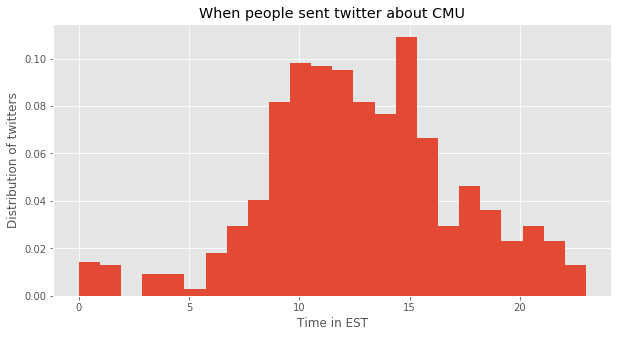

In [22]:
hour = [(json.loads(tw[1])['hour'] + 20) % 24 for tw in tw_data]
hour_count = dict(Counter(hour))
fig, ax = plt.subplots()
print(list(hour_count.values()))
# ax.barh(list(hour.keys()), list(hour.values()))
n, bins, patches = ax.hist(hour, 24, density=1)
ax.set_xlabel('Time in EST')
ax.set_ylabel('Distribution of twitters')
ax.set_title('When people sent twitter about CMU')

plt.show()

**Results**: 
1. Most twitter were sent in 15:00.
2. Some people in CMU stay up late.

### 2.2.4 Who said the most about CMU? And the frequency people say about CMU.

top 20 counts: [152, 40, 24, 23, 22, 21, 18, 17, 16, 16, 15, 14, 14, 13, 13, 11, 11, 11, 11, 10]
top 20 twitter screen_names:['cmunell', 'cmutennis', 'ESTP_CMU', 'CMUEngineering', 'CMU_DietrichHSS', 'CMU_CTTEC', 'mldcmu', 'SCSatCMU', 'CMU_Mech', 'CMU_EPP', 'CMUenergy', 'English_CMU', 'cmualumnihouse', 'CarnegieMellon', 'p4pittsburgh', 'CMU_Chem', 'CMU_BXA', 'SEInews', 'CSDatCMU', 'CmuScience']
counts of twitters: {1: 192, 2: 59, 3: 24, 4: 10, 5: 9, 6: 3, 7: 2, 8: 3, 9: 2, 10: 3, 11: 4, 13: 2, 14: 2, 15: 1, 16: 2, 17: 1, 18: 1, 21: 1, 22: 1, 23: 1, 24: 1, 152: 1, 40: 1}


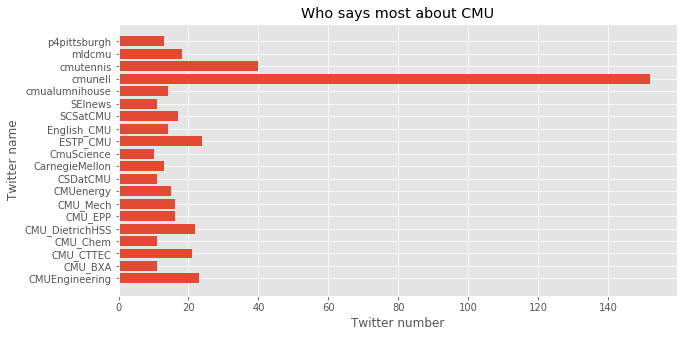

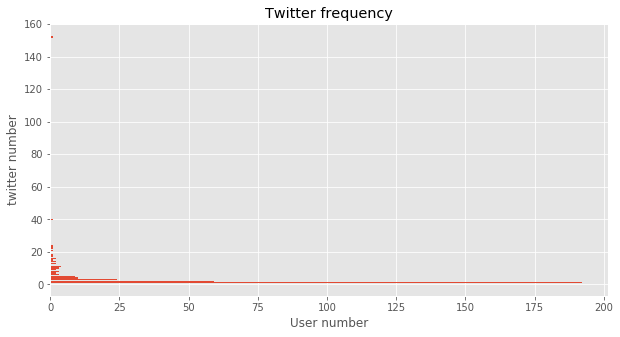

In [21]:
# histogram our data with numpy
from collections import Counter

top20 = [len(d[1]) for d in user_tw_data[:20]]
print("top 20 counts: " + str(top20))
top20_name = [json.loads(d[1][0])['screen_name'] for d in user_tw_data[:20]]
print("top 20 twitter screen_names:" + str(top20_name))

fig, ax = plt.subplots()
ax.barh(top20_name, top20)
ax.set_xlabel('Twitter number')
ax.set_ylabel('Twitter name')
ax.set_title('Who says most about CMU')

tw_number_each_user = [len(d[1]) for d in user_tw_data]
cc = dict(Counter(tw_number_each_user))
print("counts of twitters: " + str(cc))
fig, ax = plt.subplots()

ax.barh(list(cc.keys()), list(cc.values()))
ax.set_xlabel('User number')
ax.set_ylabel('twitter number')
ax.set_title('Twitter frequency')

plt.show()

**Results**:
1. "Cmunell" said the most in the previous 7 days. Who is he or she? We find that the description of "Cmunell" is: I am a machine reading research project at Carnegie Mellon, periodically tweeting facts I read. Please follow me, and reply with corrections so I can improve! So, **Cmunell is an AI**.
2. Only small amount of people say a lot, most people only say a little.

### 2.2.5 What are the top words and keywords about CMU?

Here we did some basic nature language processing using NLTK, removed the stop words and they counts the hot words and hashtags (keywords).

In [24]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

def word_map(tw_data):
    """Read a file and return a sequence of (word, occurances) values.
    """
    output = []
    for tw in tw_data:
        text = json.loads(tw[1])['text']
        for token in text.strip().split():
            if len(token) > 4 and token.lower() not in context and re.match(r'^[a-zA-Z\']+$', token):
                output.append( (token, 1) )
    return output

    return output

def word_reduce(item):
    """Convert the partitioned data for a word to a
    tuple containing the word and the number of occurances.
    """
    word, occurances = item
    return (word, sum(occurances))


stop_words = nltk.corpus.stopwords.words("english")
stop_words += ['rt', 'one', 'two', 'three', "i'm", 'us', 'May', '2018', 'cmu']
stop_words = set(stop_words)
wordcount = MapReduceJob(word_map, word_reduce, num_workers=8, worker_context=stop_words)
print('data-filter Map-Reduce job initialized.')
time.sleep(1)
word_num = wordcount(tw_data, chunksize=1)
word_num = sorted(word_num, key=lambda x: x[1], reverse=True)
print(word_num[:100])
print(len(word_num))
print('data-filter Map-Reduce job done.')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xiaoyu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/xiaoyu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/xiaoyu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
data-filter Map-Reduce job initialized.
[('students', 48), ('Carnegie', 45), ('Mellon', 41), ('Pittsburgh', 34), ('University', 30), ('Congratulations', 28), ('Professor', 24), ('Learn', 20), ('Great', 19), ('honorary', 19), ('leader', 17), ('research', 17), ('degree', 17), ('Check', 17), ("CMU's", 16), ('Congrats', 16), ('Science', 16), ('Center', 15), ('researchers', 15), ('Director', 15), ('award', 14), ('Whittaker', 13), ('place', 13), ('projects', 13), ('using', 13), ('first', 13), ('policy', 13), ('Valley', 13), ('access', 13), ('great', 12), ('connection', 12), ('working', 12), ('paper', 12), ('Machine', 12),

Text(0.5,1,'top20_word_count')

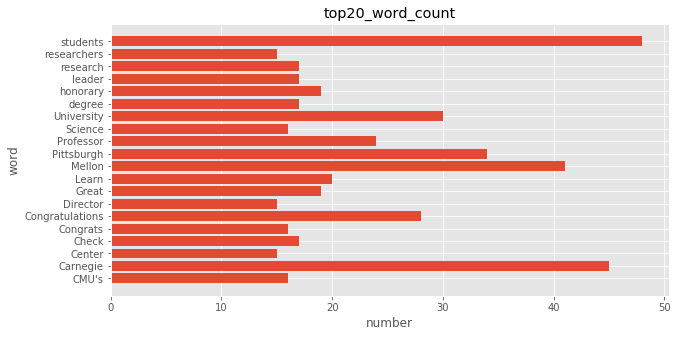

In [25]:
top50_word = [w[1] for w in word_num[:20]]
top50_word_count = [w[0] for w in word_num[:20]]

fig, ax = plt.subplots()
ax.barh(top50_word_count, top50_word)
ax.set_xlabel('number')
ax.set_ylabel('word')
ax.set_title('top20_word_count')

[('p4pgh18', 12), ('CMUDietrich', 12), ('Pittsburgh', 9), ('P4pgh18', 8), ('CMUConnect', 8), ('TartanProud', 5), ('CMU', 5), ('TakeYourChildToWorkDay', 4), ('NRELIGF2018', 4), ('opensource', 4), ('BoardGame', 4), ('AI', 4), ('innovation', 4), ('chi2018', 4), ('maythe4thbewithyou', 4), ('3Dbioprinting', 4), ('energy', 3), ('cmuhcii', 3), ('StudentConference', 3), ('trust', 3)]


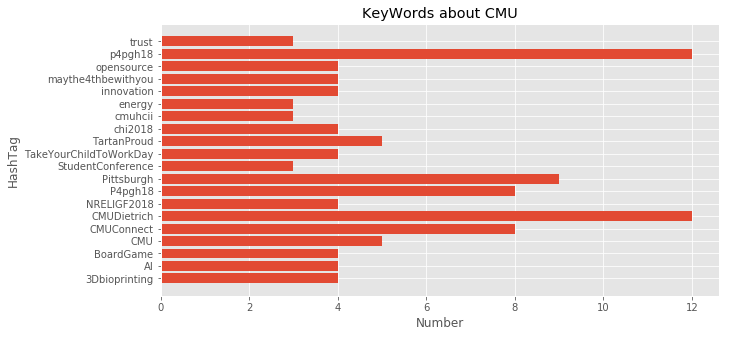

In [26]:
hashtags = [tag for d in tw_data for tag in json.loads(d[1])['hashtags']]
# print(hashtags) 
hashtags_count = dict(Counter(hashtags))
hashtags_count = sorted(hashtags_count.items(), key=operator.itemgetter(1), reverse=True)
print(hashtags_count[:20])
fig, ax = plt.subplots()
# print(list(cc.keys()), list(cc.values()))
ax.barh([t[0] for t in hashtags_count[:20]], [t[1] for t in hashtags_count[:20]])
ax.set_xlabel('Number')
ax.set_ylabel('HashTag')
ax.set_title('KeyWords about CMU')

plt.show()

**Results**:
These words reflect that CMU is really an academic research university.

## 2.3 Text Aggregation

One thing we can explore with Twitter data is to find what topics the tweets are in and how many tweets each topic contains. We can deliver that without using any labels by unsupervised clustering on the text of tweets. The procedures are as following:

- [2.3.1 Extract Text](#2.3.1-Extract-Text)
- [2.3.2 Preprocess Text](#2.3.2-Preprocess-Text)
- [2.3.3 Extract Features](#2.3.3-Extract-Features)
- [2.3.4 Clustering](#2.3.4-Clustering)
- [2.3.5 Interpretation and Visualization](#2.3.5-Interpretation-and-Visualization)

Let's import the packages that we need.

In [28]:
import collections
import json
import numpy as np
import re
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.mixture import GaussianMixture
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

### 2.3.1 Extract Text

First we extract all the text of tweets from the raw data. The raw data produced by Twitter API is in the format of json string, so we use json package to transform each line into a python dictionary. We only pick tweets whose users are in Pittsburgh to avoid ambiguity of "CMU". 

In [29]:
def get_texts(filename):
    res = []
    with open(filename, "r", encoding="utf-8") as fr:
        for line in fr:
            j = json.loads(line)
            # only choose tweets from Pittsburgh
            if "Pittsburgh" in j["user"]["location"]:
                res.append(j["text"])
    return res


texts = get_texts("result-full.txt")
# Number of tweets about CMU, Pittsburgh
print(len(texts))

1155


### 2.3.2 Preprocess Text

We must preprocess text to prepare for the TF-IDF feature extraction. To make TF-IDF features more effective to represent each tweet, we need to reduce unnecessary information in each tweet, such as its punctuation, the inflection of words, etc. We also remove words that contain less than 3 characters which are noisy and mean little, and also words starts with "http" which are usually url links.

In [30]:
def preprocessing(text):
    text = text.lower()
    text = text.replace("'s", "")
    text = text.replace("'", "")
    punctuation = set(string.punctuation)
    # Remove punctuations.
    for p in punctuation:
        text = text.replace(p, "")
    words = text.split()
    lemmatizer = WordNetLemmatizer()
    res = []
    # Lemmatize words
    for word in words:
        try:
            word = lemmatizer.lemmatize(word)
        except:
            continue
        # Remove too short words and urls
        if len(word) >= 3 and not word.startswith("http"):
            res.append(word)
    return " ".join(res)

    
texts = [preprocessing(text) for text in texts]

### 2.3.3 Extract Features

We use TF-IDF as feature of each tweet text. TF-IDF is the multiplication between term frequency of each word in the text and its inverse document frequency. If a word appears frequent in the current tweet or only appears in a small number of documents, it will have a high TF-IDF score. We remove rare words that only appear 1 times because they make the vocabulary much bigger add a lot of noisy features. We also remove stop words and 10 most frequent words because they are not very useful for topics.

In [31]:
def get_tfidf_features(texts):
    rare_words = []
    all_words = []
    for text in texts:
        curr_words = text.split()
        all_words += curr_words
    # Add rare words and most frequent words to stop words
    counter = collections.Counter(all_words)
    for c in counter:
        if counter[c] <= 1:
            rare_words.append(c)
    rare_words = sorted(rare_words)
    stop_words = stopwords.words("english") + rare_words
    for c in counter.most_common(10):
        stop_words.append(c[0])
    # Extract TF-IDF features
    tfidf = TfidfVectorizer(input="content", stop_words=stop_words)
    res = tfidf.fit_transform(texts)
    return tfidf, res 


tfidf, features = get_tfidf_features(texts)
print(features.shape)

(1155, 1810)


### 2.3.4 Clustering

We use Gaussian Mixture Model to clustering tweets into several groups, thus the mean of each component of Gaussian Mixture Model can represent the topic of this group of tweets. It is hard to decide how many clusters to train, we can choose a number at first and then check the results manually to decide to increase or decrease the number.

In [36]:
def clustering(features, num_cluster=5):
    gmm = GaussianMixture(num_cluster).fit(features.toarray())
    centers = gmm.means_
    return gmm, centers


kmeans, centers = clustering(features, 5)
print(centers.shape)

(5, 1810)


### 2.3.5 Interpretation and Visualization

After we get the features of the clustering center, we need to transform them back to words so that we can interpret it. We use the top 6 words with highest tfidf scores of each center as its text representation, because a high TF-IDF score usually means this word conveys more information of this text.

In [37]:
def features_to_text(centers, gmm):
    vocab = gmm.vocabulary_
    new_vocab = {}
    for k in vocab.keys():
        new_vocab[vocab[k]] = k
    # Get the indexes of 6 words with highest TF-IDF scores
    indexes = [np.asarray(center).argsort()[-6:][::-1] for center in centers]
    res = []
    for i in range(len(centers)):
        # Transform indexes back to words
        curr = [new_vocab[np.asscalar(j)] for j in indexes[i]]
        res.append(curr)
    return res


center_texts = features_to_text(centers, tfidf)
print(center_texts)

[['levinedowning', 'chenboppana', 'calzolanoash', 'amp', 'wash', 'carnegiemellon'], ['great', 'science', 'see', 'part', 'exhibit', 'join'], ['degree', 'cosby', 'honorary', 'revoke', 'say', 'bill'], ['mellon', 'carnegie', 'university', 'entrepreneur', 'connection', 'access'], ['pittsburgh', 'robotics', 'solve', 'cofounder', 'valley', 'problem']]


We can see the distribution of tweets in term of topics by checking how many tweets each center is assigned to. 

['levinedowning', 'chenboppana', 'calzolanoash', 'amp', 'wash', 'carnegiemellon']
['great', 'science', 'see', 'part', 'exhibit', 'join']
['degree', 'cosby', 'honorary', 'revoke', 'say', 'bill']
['mellon', 'carnegie', 'university', 'entrepreneur', 'connection', 'access']
['pittsburgh', 'robotics', 'solve', 'cofounder', 'valley', 'problem']
[782, 244, 24, 59, 46]


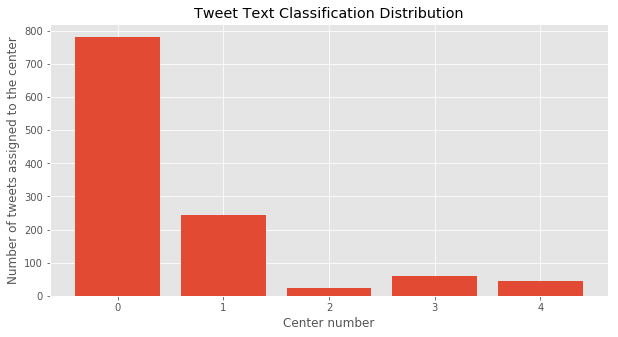

In [38]:
y = kmeans.predict(features.toarray())
for center in center_texts:
    print(center)
distribution = []
for i in range(len(center_texts)):
    distribution.append((np.where(y==i))[0].shape[0])
print(distribution)
fig, ax = plt.subplots()
# ax.bar(["#1", "#2", "#3"], distribution)
ax.bar(range(len(distribution)), distribution)
ax.set_xlabel('Center number')
ax.set_ylabel('Number of tweets assigned to the center')
ax.set_title('Tweet Text Classification Distribution')
plt.show()

## 2.4 Sentimental Analysis

For sentimental analysis, we just want to know the basic attitude of people towards CMU. So we just need to decide whether the attitude is positive or negative. [3]

Here we use TextBlob to do the sentimental analysis. What TextBlob do are:
1. Tokenized.
2. Remove stop words.
3. Do part of speech tagging to keep the words that can convey sentiment like adj, adv.
4. Pass the tokens to sentiment classifier, which is train by movies reviews dataset using Naive Bayes.

In [40]:
import re
import tweepy
import json
from textblob import TextBlob
 
class SentimentalAnalysis(object):
    def clean_tweet(self, tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])\
                                    |(\w+:\/\/\S+)", " ", tweet).split())
 
    def get_tweet_sentiment(self, tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
 
    def get_tweets(self):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []
 
        try:
            # call twitter api to fetch tweets
            with open("result-full.txt", "r") as f:
                for line in f:
                    tweet = json.loads(line.strip())
                    parsed_tweet = {}

                    # saving text of tweet
                    parsed_tweet['text'] = tweet['text']
                    # saving sentiment of tweet
                    parsed_tweet['sentiment'] = self.get_tweet_sentiment(parsed_tweet['text'])

                    # appending parsed tweet to tweets list
                    if tweet['retweet_count'] > 0:
                        # if tweet has retweets, ensure that it is appended only once
                        if parsed_tweet not in tweets:
                            tweets.append(parsed_tweet)
                    elif "Pittsburgh" in tweet["user"]["location"]:
                        tweets.append(parsed_tweet)
 
            # return parsed tweets
            return tweets
 
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))

In [44]:
# creating object of TwitterClient Class
analysis = SentimentalAnalysis()
# calling function to get tweets
tweets = analysis.get_tweets()

ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
# percentage of neutral tweets
print("Neutral tweets percentage: {} % \
    ".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)))

# printing first 5 positive tweets
print("\n\nPositive tweets:")
for tweet in ptweets[:5]:
    print(tweet['text'])

# printing first 5 negative tweets
print("\n\nNegative tweets:")
for tweet in ntweets[:5]:
    print(tweet['text'])

Positive tweets percentage: 42.43472790185593 %
Negative tweets percentage: 15.382195659012268 %
Neutral tweets percentage: 42.1830764391318 %     


Positive tweets:
RT @D3NEWomens: Pool C w 1 more day left:
C1 Midd
C2 Wesleyan
C3 Tufts
C4 Pomona
C5 Amherst
C6 Chicago
C7 CMU
C8 Washu
-------
Bowdoin (los…
RT @BreonnaMeyerr: So excited for everyone graduating this weekend at CMU! Can’t wait to be able to turn left on mission again :)
RT @TNGridironScout: 2020 ATH @AjDavis1321 Is Baller...So Explosive He Already Has Offers From Indiana, CMU, WCU &amp; UTC.. Can't Wait To 👀 Hi…
Pool C w 1 more day left:
C1 Midd
C2 Wesleyan
C3 Tufts
C4 Pomona
C5 Amherst
C6 Chicago
C7 CMU
C8 Washu
-------
Bowd… https://t.co/cj3BuFXyod
RT @GearyJW: Rt if you love CMU and everything it has done for you! Spread positivity not negativity. https://t.co/H3wpSv48KL


Negative tweets:
RT @CMUSoftball: T4 | Kalina with a three-run DINGER to left center! CMU leads 3-0 with zero outs! #FireUpChips
RT @CMLIFE: Conside

**Results**:
From the basic sentimental analysis, we can know that people like CMU more than hate it.

## 2.5 Topic center Analysis

We know that PageRank algorithm is a famous graph search algorithm that can find the most influential nodes. Here we want to use PageRank alogorithm to find the most influential twitter account. And reversely, we can find the biggest fans of CMU.

We had collected the data in [2.1.2 Follower Data Acquirement](#2.1.2-Follower-Data-Acquirement). First, we need to use these data to build the graph. For the most influential twitter account, we need to build the follower-followee graph, which means the arrow is from follower to followee. For the biggest fans, we need to build the reversed graph, followee-follower graph, which means the arrow is from followee to follower. We finish this task using [NetworkX](https://networkx.github.io/), which is a package that specifically deal with graph problems. It contains functions to do the pagerank and graph visualization. [4]

In [52]:
import json
import os
import json
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

CMU_user_set = set()

with open("result-full.txt", "r") as f:
    for line in f:
        tweet = json.loads(line.strip())
        user_id = str(tweet['user']['id'])
        if "Pittsburgh" in tweet["user"]["location"]:
            CMU_user_set.add(user_id)

path = "./followers_information/"

filenames = os.listdir(path)

nodes = set()
follower_followee_edges = []
followee_follower_edges = []

for filename in filenames:
    if filename.endswith(".txt"):
        with open(path + filename, "r") as f:
            jsonobject = json.loads(f.read())
            for user_id, information in jsonobject.items():
                if user_id in CMU_user_set:
                    nodes.add(user_id)
                if information[0] > 0:
                    for follower in information[1]:
                        if follower in CMU_user_set and user_id in CMU_user_set:
                            follower_followee_edges.append((user_id, follower))
                            followee_follower_edges.append((follower, user_id))

nodes = list(nodes)
print("Nodes count:" + str(len(nodes)))
print("Edges count:" + str(len(follower_followee_edges)))

Nodes count:261
Edges count:1117


Here, we build the follower-followee graph and ran PageRank to find the most influential twitter account.

[('21780652', 0.0498385023958892), ('117171240', 0.034985784269937065), ('190085892', 0.028178537079645405), ('3392755149', 0.025088104984867556), ('14232085', 0.02306682026877951), ('310983849', 0.01878990356938599), ('2250997562', 0.01842414217542412), ('537432402', 0.017285130514852063), ('106812593', 0.015447589352368398), ('32475415', 0.014603108977507658)]


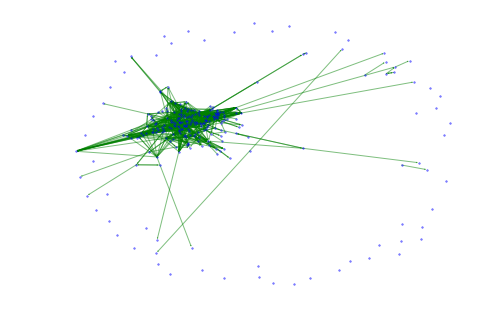

In [55]:
followee_graph = nx.DiGraph()
followee_graph.add_nodes_from(nodes)
followee_graph.add_edges_from(followee_follower_edges)

followee = nx.pagerank_numpy(followee_graph, alpha=0.9)
result2 = sorted(followee.items(), key=lambda x:x[1], reverse=True)
print(result2[0:10])

plt.clf()
nx.draw(followee_graph,node_size=3,width=1,arrowsize=1,alpha=0.5,node_color="b",edge_color="g")
plt.savefig("Pittsburgh_popular_followees.pdf")

Let's see the top 3 most influential twitter accounts.

1. ![Pittsburgh Post-Gazette]()
2. ![CMU School of Computer Science]()
3. ![Daniel Gilman]()

Here, we build the followee-follower graph and ran PageRank to find the biggest fans.

[('80410299', 0.02267052161769328), ('830083993089482752', 0.01954938901087676), ('581999820', 0.019361110443522404), ('4025978938', 0.019298184715295413), ('15530774', 0.018764586356654227), ('701521877248782337', 0.018124384981465482), ('417592778', 0.016172617681082527), ('733674174116421632', 0.016026166625423815), ('2364445033', 0.015227430146525665), ('3059427263', 0.015022739925631906), ('623203476', 0.01435591596396889), ('14232085', 0.012707716333133197), ('122192392', 0.01264029936988684), ('1513023296', 0.012464398087990079), ('2490841258', 0.012031221407507198), ('952295199044141056', 0.01181147641778908), ('9647442', 0.011646194907593662), ('58904769', 0.011153649650385716), ('174052756', 0.011001804473413321), ('56028869', 0.010723290072022313)]


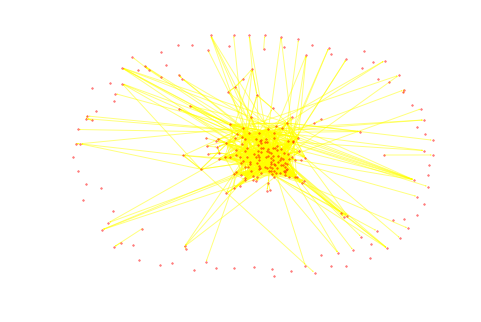

In [56]:
follower_graph = nx.DiGraph()
follower_graph.add_nodes_from(nodes)
follower_graph.add_edges_from(follower_followee_edges)

follower = nx.pagerank_numpy(follower_graph, alpha=0.9)
result1 = sorted(follower.items(), key=lambda x:x[1], reverse=True)
print(result1[0:20])

nx.draw(follower_graph,node_size=3,width=1,arrowsize=1,alpha=0.5,node_color="r",edge_color="yellow")
plt.savefig("Pittsburgh_popular_followers.pdf")

We can only get 4 screen name in the top 20 user id results, others hide their screen name.
1. ![Lisa Zilinski]()
2. ![Adam Smeltz]()
3. ![Dan Klinedinst]()
4. ![Jay Ting Walker]()

**Results**:
1. Compared the follwer-followee graph and followee-follower graph, we can find that fans distribute more evenly than influential twitter account.
2. Different from the most influential twitter account always get public of their screen_name so that we can search their twitter account directly and find what exactly they are, however, the biggest fans always hide their screen_name, so even we can get their user_id, but cannot get their twitter account directly.

# 3. Application and the things that can do in the furture

Yeah! Now we had already got some information about CMU. This help me, a new commer of CMU, to know something vivid about CMU. This meet my own needs. But could I use this information to help more people to use this information?

I think these are the things that I can do in the future to make this information that I got more meaningful:

1. Structured the data that I got and put them into database. Build backend and frontend to provide an interective information showing to others.
2. Book for prime membership of Twitter API to get the entire data to do the analysis.
3. Do more experiments to update the search query to get better raw data.
4. Search more school and university, so that I can build a information provider system for people, which can make the data mining results to become a service that can be used by others.

# 4. Conclusion

The problem that we want to solve is what knowledge or vivid information can we get from twitter about CMU, which is a data mining and knowledge generation problem. We used several techniques in the course to try to solve this problem, which includes calling the api of twitter, using matplotlib to do data visulization, using NLTK to do the basic cleaning of text data, MapReduce to distributed analyze data, Gaussian Mixture Model to do the text aggregation and PageRank to find the most important nodes, etc. Finally, we actually get some vivid results from the twitter data about CMU.

# Reference

[1] https://www.toptal.com/python/twitter-data-mining-using-python

[2] https://stackoverflow.com/questions/17431807/get-all-follower-ids-in-twitter-by-tweepy

[3] https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python

[4] https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html